# Play around with fake data

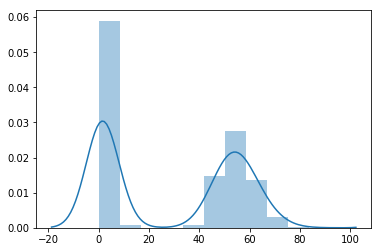

In [32]:
from numpy.random import lognormal
import seaborn as sns
import numpy as np
from models.mm import LogNormalMM
import matplotlib.pyplot as plt

mu1, sigma1 = 0, 1 # mu and sigma
s1 = lognormal(mu1, sigma1, 1000)
mu2, sigma2 = 4, 0.125
s2 = lognormal(mu2, sigma2, 1000)

s = np.concatenate((s1, s2), axis = 0)

sns.distplot(s)

## Note: Y = lnX yields a normal distribution with parameters mu and sigma

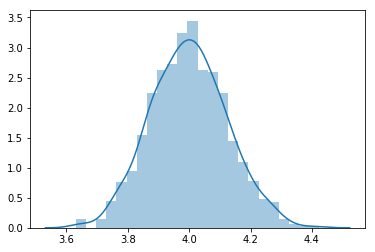

In [33]:
y = np.log(s2)
sns.distplot(y)

In [34]:
np.sqrt(np.var(y))

0.12386135979309384

In [35]:
s = np.concatenate((s1, s2), axis = 0)
y = np.log(s)
print(np.mean(y), np.var(y))

2.035479084592645 4.33980328789444


## Using data to fit the model

Model API:  <br> <br>
logNormalMM.fit(data, max_iterations, verbose) <br> <br>
logNormalMM.fit_predict(data, max_iterations, verbose) <br>

In [36]:
from models.mm import LogNormalMM
log_mm = LogNormalMM(tol=1e-15)
prediction = log_mm.fit_predict(s, max_iterations=50, verbose=False)

----------Log-Normal Mixture Model Successfully Fit-------------
Distribution 1: LogNormal(3.3473083136329267, 1.2890273844767577), mean: 8.655092383225416, variance: 934.1318984251966
 Distribution 2: LogNormal(-0.29438160149578646, 0.7821657095129025), mean: 1.3888889225602292, variance: 0.33759507023103363


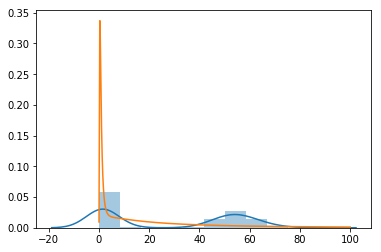

In [37]:
sns.distplot(s)
x = np.linspace(-20, 100, 2000)
log_mix = [log_mm.pdf(i) for i in x]
plt.plot(x, log_mix)

In [38]:
np.unique(prediction, return_counts=True)

(array([0, 1]), array([1282,  718]))

# Empirical Experiment From Weibo Data

Iteration 0: Mixture: LogNormal(0.5012240251471382, 0.8450713527464794), mean: 5.784250131178954, variance: 10.793882960236845, LogNormal(2.172064685487034, 0.2762336656023247), mean: 6.928127142511793, variance: 3.292039199220084, mix = 0.8788224151234291
Iteration 1: Mixture: LogNormal(0.40578346979752833, 0.7280072722421469), mean: 5.784250131178954, variance: 10.793882960236845, LogNormal(2.313655853102631, 0.21611063927708518), mean: 6.928127142511793, variance: 3.292039199220084, mix = 0.8438527681987341
----------Log-Normal Mixture Model Successfully Fit-------------
Distribution 1: LogNormal(0.40578346979752833, 0.7280072722421469), mean: 5.784250131178954, variance: 10.793882960236845
 Distribution 2: LogNormal(2.313655853102631, 0.21611063927708518), mean: 6.928127142511793, variance: 3.292039199220084


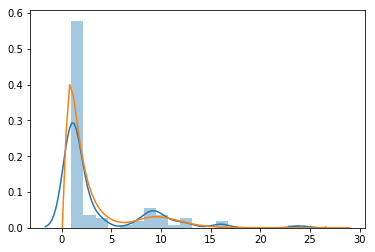

In [28]:
from models.mm import LogNormalMM
import numpy as np
import matplotlib.pyplot as plt
from models.models import DataLoader
import seaborn as sns
from glob import glob

DATA_PATH="./repost/"

loader = DataLoader(DATA_PATH)

real_data, pois, pid = loader.get_data(1)

## Fit the log normal mixture model
real_data = np.array(real_data)

logmm = LogNormalMM(tol=1e-15)

prediction = logmm.fit_predict(real_data)
    
sns.distplot(real_data)
x = np.linspace(min(real_data)-5, max(real_data)+5, len(real_data))
log_mix = [logmm.pdf(i) for i in x]
plt.plot(x, log_mix)